# Write functions

Import modules

In [1]:
# System tools
import os

# Data analysis
import pandas as pd
from tqdm import tqdm
import random
from datetime import datetime

# Network analysis tools
import networkx as nx
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (20,20)

### Load data 

In [2]:
# Get dataset  
# Get the filepath
# filepath = os.path.join("in", "cit-HepPh.txt")
# Reading the filepath 
# with open(filepath, "r") as f:
    # txt = f.read()

In [3]:
# Get rid of hastaged lines 
# txt_data = txt.split("\n", 4)[4]

In [4]:
# Write new file without hastags
# outpath = os.path.join("in", "cit_HepPh_read.txt")
# with open(outpath, "w") as f:
    # f.write(txt_data)

In [3]:
# Load data without hastag  
# Get the filepath
# filepath = os.path.join("in", "cit_HepPh_read.txt")
# Reading the filepath 
# data = pd.read_csv(filepath, header = None, sep='\t', names = ("Source", "Target"))

In [4]:
# Int to string
# data["Source"] = data["Source"].apply(str)
# data["Target"] = data["Target"].apply(str)

In [36]:
def load_data(filename, cleaning = True):  
    if cleaning == True:
        # Get the filepath
        filepath = os.path.join("in", filename)
        # Reading the filepath 
        with open(filepath, "r") as f:
            txt = f.read()
    
        # > Get rid of hastaged lines 
        # Split on newline
        split_txt = txt.split("\n")
        # Get rid of all lines containing a hastag
        txt_data = list(filter(lambda x: "#" not in x, split_txt))
        # Join data again
        txt_data = '\n'.join(txt_data)
    
        # > Write new file without hastags
        # Define outpath 
        outpath = os.path.join("in", "clean_edges.txt")
        with open(outpath, "w") as f:
            f.write(txt_data)
            
        # > Load data without hastag  
        # Get the filepath
        filepath = os.path.join("in", "clean_edges.txt")
        # Reading the filepath 
        data = pd.read_csv(filepath, header = None, sep='\t', names = ("Source", "Target"))
    else:
        # > Load data without hastag  
        # Get the filepath
        filepath = os.path.join("in", filename)
        # Reading the filepath 
        data = pd.read_csv(filepath, header = None, sep='\t', names = ("Source", "Target"))
    
    # Convert columns from int to string
    data["Source"] = data["Source"].apply(str)
    data["Target"] = data["Target"].apply(str)
    
    return data

In [37]:
def load_dates(filename, cleaning = True):  
    if cleaning == True:
        # Get the filepath
        filepath = os.path.join("in", filename)
        # Reading the filepath 
        with open(filepath, "r") as f:
            txt = f.read()
    
        # > Get rid of hastaged lines 
        # Split on newline
        split_txt = txt.split("\n")
        # Get rid of all lines containing a hastag
        txt_data = list(filter(lambda x: "#" not in x, split_txt))
        # Join data again
        txt_data = '\n'.join(txt_data)
    
        # > Write new file without hastags
        # Define outpath 
        outpath = os.path.join("in", "clean_dates.txt")
        with open(outpath, "w") as f:
            f.write(txt_data)
            
        # > Load data without hastag  
        # Get the filepath
        filepath = os.path.join("in", "clean_dates.txt")
        # Reading the filepath 
        dates = pd.read_csv(filepath, header = None, sep='\t', names = ("ID", "date"))
    else:
        # > Load data without hastag  
        # Get the filepath
        filepath = os.path.join("in", filename)
        # Reading the filepath 
        dates = pd.read_csv(filepath, header = None, sep='\t', names = ("ID", "date"))
    
    # Convert columns from int to string
    dates["ID"] = dates["ID"].apply(str)
    dates["date"] = pd.to_datetime(dates["date"], format = "%Y-%m-%d")
    
    return dates   

In [32]:
data = load_data("cit-HepPh.txt")

In [38]:
dates = load_dates("clean_dates.txt", cleaning = False)

In [39]:
dates.head()

,ID,date
0,9203201,1992-02-24
1,9203202,1992-03-08
2,9203203,1992-03-03
3,9203204,1992-03-09
4,9203205,1992-03-09


In [12]:
data.head()

,Source,Target
0,9907233,9301253
1,9907233,9504304
2,9907233,9505235
3,9907233,9506257
4,9907233,9606402


### Sample data 

In [8]:
# Get dataframe of the nr. of appearances of each ID
count_df = data.apply(pd.value_counts)

In [13]:
filter_list = count_df[count_df["Source"] > 10].index.tolist()

In [15]:
filter_df = data[data["Source"].isin(filter_list)]

In [17]:
random.seed(42)
# Get list of source nodes
node_list = filter_df["Source"].unique().tolist()
# Get a random sample
sample_nodes = random.sample(node_list, 100)

In [18]:
# Subsample those nodes
sample_df = data[data["Source"].isin(sample_nodes) | data["Target"].isin(sample_nodes)]

In [14]:
def sample(data, seed = 42, min_freq = 10, nr_nodes = 100):
    # Get dataframe of the nr. of appearances of each ID
    count_df = data.apply(pd.value_counts)
    # Filter out atricles that do not appear often 
    filter_list = count_df[count_df["Source"] > 10].index.tolist()
    filter_df = data[data["Source"].isin(filter_list)]
    
    # Set seed 
    random.seed(seed)
    # Get list of source nodes
    node_list = filter_df["Source"].unique().tolist()
    # Get a random sample of source nodes
    sample_nodes = random.sample(node_list, nr_nodes)
    # Keep only the edges that involve those nodes
    sample_df = data[data["Source"].isin(sample_nodes) | data["Target"].isin(sample_nodes)]
    
    return sample_df

In [15]:
sample_df = sample(data)

### Draw network

In [16]:
# This seems to create a directed grapth
# G = nx.from_pandas_edgelist(sample_df, source='Source',target='Target', edge_attr=None, create_using=nx.DiGraph())
# nx.is_directed(G)
# This is what I have trouble with
# nx.draw_networkx(G, with_labels=False, node_size=20)

In [20]:
# > Save figure 
def make_figure(data):
    # Define directed graph
    G = nx.from_pandas_edgelist(data, source='Source', target='Target', edge_attr=None, create_using=nx.DiGraph())
    # Draw figure 
    nx.draw_networkx(G, with_labels=False, node_size=20)
    # Define outpath
    outpath = os.path.join("output", "network_graph.png")
    # Save figure 
    plt.savefig(outpath, dpi=100, bbox_inches="tight")
    
    return G

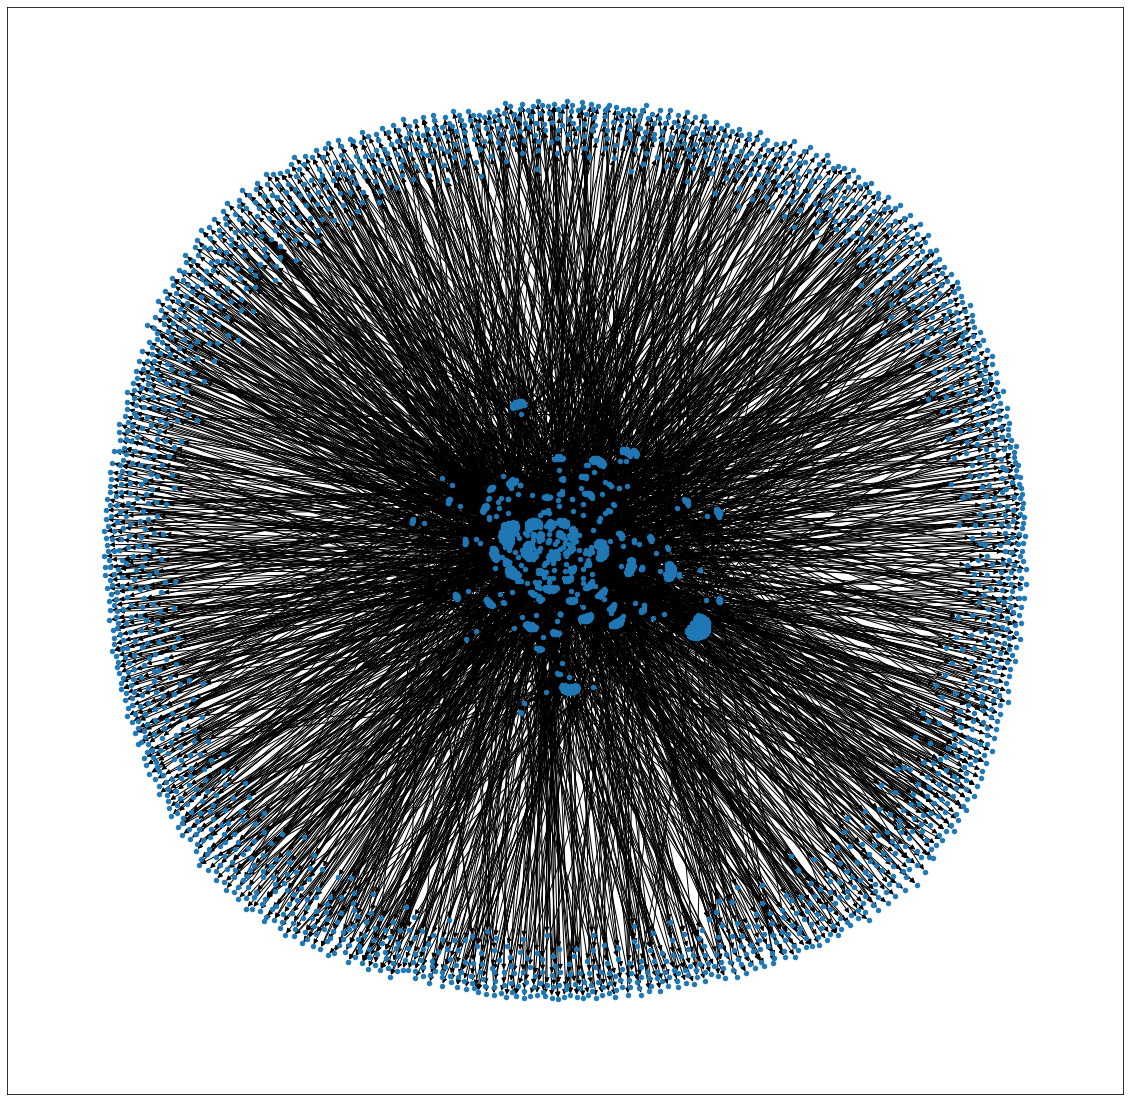

In [21]:
G = make_figure(sample_df)

### Get centrality measures

In [43]:
def centrality_scores(G, dates):
    # Finding degrees and creating dataframe 
    degrees = G.degree()
    df = pd.DataFrame(degrees, columns = ["ID", "degree"])
    # Finding in degree
    in_degrees = G.in_degree()
    df["in_degree"] = [v for k, v in in_degrees]
    # Finding out degree
    out_degrees = G.out_degree()
    df["out_degree"] = [v for k, v in out_degrees]
    # Finding and adding betweenness centrality 
    bc = nx.betweenness_centrality(G)
    df["betweenness"] = bc.values()
    # Finding and adding eigrnvector centrality
    ev = nx.eigenvector_centrality(G)
    df["eigenvector"] = ev.values()
    
    # > Add dates for good measure
    merged = pd.merge(df, dates, on="ID")

    # Save the dataframe
    outpath = os.path.join("output", "centrality_df.csv")
    merged.to_csv(outpath, index=False)
    
    return merged

In [44]:
scores = centrality_scores(G, dates)

In [47]:
scores.dtypes

ID                     object
degree                  int64
in_degree               int64
out_degree              int64
betweenness           float64
eigenvector           float64
date           datetime64[ns]
dtype: object

### Create reading list  

In [29]:
high_degree = scores.nlargest(5, "degree")
high_in = scores.nlargest(5, "in_degree")
high_out = scores.nlargest(5, "out_degree")
high_bc = scores.nlargest(5, "betweenness")
high_ev = scores.nlargest(5, "eigenvector")
reading_list = pd.concat([high_degree, high_in, high_out, high_bc, high_ev])

In [30]:
len(reading_list)

25

In [31]:
reading_list = reading_list.drop_duplicates() 

In [55]:
def get_reading_list(scores):
    # Get articles with 10 highest degree centrality
    high_degree = scores.nlargest(10, "degree")
    # Get articles with 10 highest in degree centrality
    high_in = scores.nlargest(10, "in_degree")
    # Get articles with 10 highest out degree centrality
    high_out = scores.nlargest(10, "out_degree")
    # Get articles with 10 highest betweenness centrality
    high_bc = scores.nlargest(10, "betweenness")
    # Get articles with 10 highest eigenvector centrality
    high_ev = scores.nlargest(10, "eigenvector")
    # Add it all together 
    reading_list = pd.concat([high_degree, high_in, high_out, high_bc, high_ev])
    # Remove duplicates
    reading_list = reading_list.drop_duplicates() 
    
    # Save the dataframe
    outpath = os.path.join("output", "reading_list.csv")
    reading_list.to_csv(outpath, index=False)
    
    return reading_list

In [56]:
reading_list = get_reading_list(scores)

In [52]:
reading_list.head()

,ID,degree,in_degree,out_degree,betweenness,eigenvector,date
8,9807423,134,116,18,0.000316,3.250498e-05,1998-07-20
1,9503492,131,114,17,0.000459,1.625483e-04,1995-04-01
398,9602238,107,40,67,0.000287,1.228922e-15,1996-02-06
5,9908395,100,39,61,0.000471,3.633736e-10,1999-08-18
148,5159,89,14,75,0.000817,3.250498e-05,2000-05-17


### Plot histogram  

In [57]:
def histogram(scores):
    # Define figure
    fig, ax = plt.subplots()
    # Plot histogram
    ax.hist(scores["date"], bins = 50)
    # Add title
    plt.title("Date histogram", fontsize = 15)
    # Save plot
    plt.savefig(os.path.join("output", "histogram_img.png"), bbox_inches = "tight")

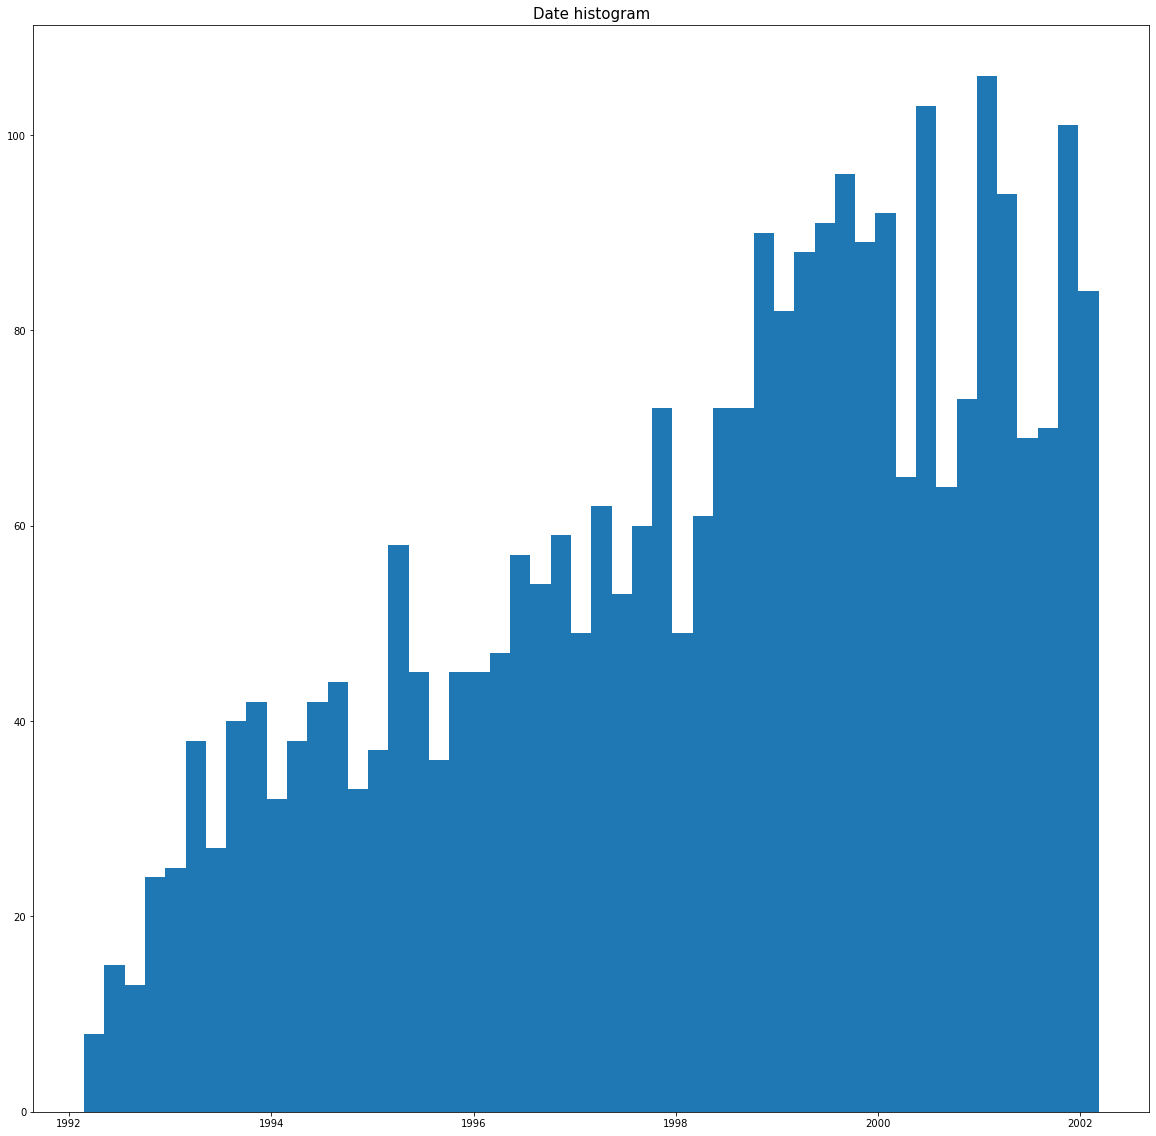

In [58]:
histogram(scores)

### Plot degrees 

In [61]:
def plot_prep(scores):
    # Create dateobject that contains year and month, but not day 
    scores['month'] = scores['date'].apply(lambda x: x.strftime('%Y-%m'))
    # Calculate mean scores by month
    mean_df = scores.drop(["ID", "date"], axis=1).groupby("month").mean().reset_index()
    # Ensure that "month" is still a datetime type 
    mean_df["month"] = pd.to_datetime(mean_df["month"], format = "%Y-%m")
    
    return mean_df

In [62]:
plot_data = plot_prep(scores)

In [63]:
def plot_degrees(data):
    # Create figure
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3)
    fig.set_size_inches(20, 5)

    # > Draw subplot 1 (degrees)
    ax1.set_title("Degrees", fontsize = 15)
    ax1.set_ylabel("Mean degrees (by month)", fontsize = 12)
    ax1.bar(data["month"], data["degree"], width = 30)
    # > Draw subplot 2 (in degrees)
    ax2.set_title("In degrees", fontsize = 15)
    ax2.set_ylabel("Mean in degrees (by month)", fontsize = 12)
    ax2.bar(data["month"], data["in_degree"], width = 30)
    # > Draw subplot 3 (out degrees)
    ax3.set_title("Out degrees", fontsize = 15)
    ax3.set_ylabel("Mean out degrees (by month)", fontsize = 12)
    ax3.bar(data["month"], data["out_degree"], width = 30)

    # Save plot
    plt.savefig(os.path.join("output", "degree_img.png"), bbox_inches = "tight")

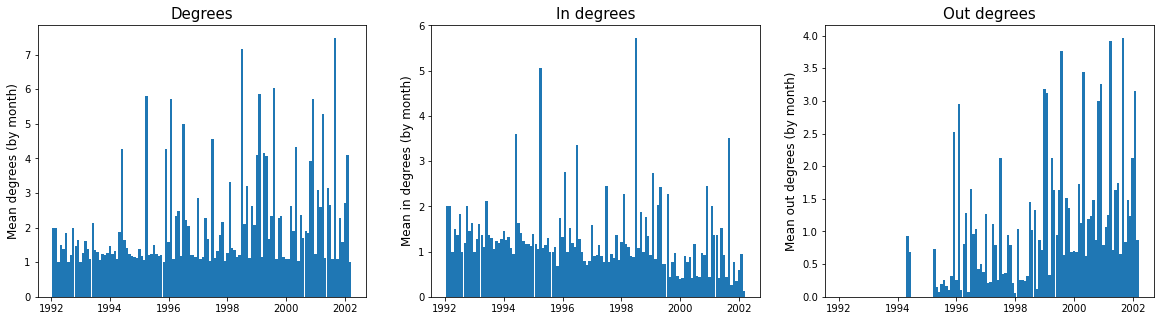

In [64]:
plot_degrees(plot_data)

### Plot BC and EV 

In [65]:
def bc_ev_plot(data): 
    # Create figure
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(15, 5)

    # Draw bars
    ax1.set_title("Betweenness Centrality", fontsize = 15)
    ax1.set_ylabel("Mean BC (by month)", fontsize = 12)
    ax1.bar(data["month"], data["betweenness"], width = 30)
    ax2.set_title("Eigenvector Centrality", fontsize = 15)
    ax2.set_ylabel("Mean in EVC (by month)", fontsize = 12)
    ax2.bar(data["month"], data["eigenvector"], width = 30)

    # Save plot
    plt.savefig(os.path.join("output", "bc_ev_img.png"), bbox_inches = "tight")

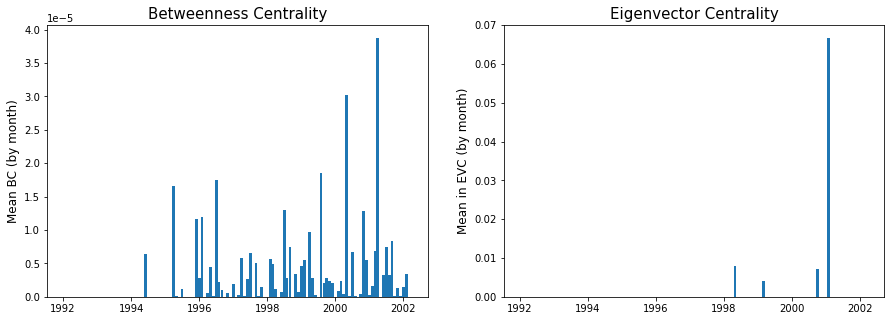

In [66]:
bc_ev_plot(plot_data)